In [90]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [91]:
bank_one_hot_data = pd.read_csv(os.getcwd()+'\\One_hot_encoded.csv')
X = bank_one_hot_data.drop(columns=['y_yes','Unnamed: 0'])
y = bank_one_hot_data['y_yes']
ssc = StandardScaler(with_mean=True,with_std=True)
ssc.fit_transform(X)

array([[ 1.53307493,  0.02695841, -0.67334608, ..., -0.34102424,
         0.39974677, -0.18645954],
       [ 1.62899827, -0.44395837, -0.67334608, ..., -0.34102424,
         0.39974677, -0.18645954],
       [-0.28946853, -0.12020309, -0.67334608, ..., -0.34102424,
         0.39974677, -0.18645954],
       ...,
       [ 1.53307493, -0.27577381, -0.19880218, ..., -0.34102424,
         0.39974677, -0.18645954],
       [ 0.38199485,  0.78799356, -0.67334608, ..., -0.34102424,
         0.39974677, -0.18645954],
       [ 3.25969505, -0.0655431 ,  0.27574172, ...,  2.93234286,
        -2.50158369, -0.18645954]])

In [92]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin', 'job_bluecollar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_selfemployed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic',
       'education_highschool', 'education_illiterate',
       'education_professionalcourse', 'education_universitydegree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Logistic Regression

In [94]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.912324
Best: 0.908369 using {'C': 100}
mean_test_score : [0.90518087 0.90784795 0.90554874 0.90784795 0.9083691 ]
std_test_Score : [0.0022034  0.00255826 0.00391438 0.00141948 0.00213142]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


Decision Tree Classifier<br>
<br>
Entropy

In [95]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(x_train,y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(x_test)
ds_tree_entropy_y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8897608828939301
Balanced accuracy: 0.7267138225271417
Precision score for "Yes" 0.490343347639485
Precision score for "No" 0.9412986293783746
Recall score for "Yes" 0.5187287173666288
Recall score for "No" 0.9346989276876546


### Decision Tree - Entropy - GridSearch <br>

In [97]:
entr_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_entr_gsmodel_result.cv_results_['params']))

Best: 0.913611 using {'max_depth': 5}
mean_test_score : [0.90177805 0.90058246 0.9111588  0.91361128 0.91361128 0.91198651]
std_test_Score : [0.00158525 0.00175196 0.00190117 0.00103325 0.00147213 0.00099053]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


Decision Tree<br><br>
Gini

In [98]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(x_train,y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(x_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8884120171673819
Balanced accuracy: 0.7254589059286929
Precision score for "Yes" 0.48459086078639746
Precision score for "No" 0.9410867757138897
Recall score for "Yes" 0.5175936435868331
Recall score for "No" 0.9333241682705526


### Decision Tree - Gini - GridSearch<br>

In [99]:
gini_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_gini_gsmodel_result.cv_results_['params']))

Best: 0.913305 using {'max_depth': 5}
mean_test_score : [0.89969344 0.90576334 0.91112814 0.9131821  0.91330472 0.91213979]
std_test_Score : [0.00319559 0.00233952 0.00376758 0.00130999 0.00139679 0.00095182]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


## Naive Baeys Classifier 

In [100]:

nb = GaussianNB()
nb_result = nb.fit(x_train,y_train)
nb_y_pred = nb.predict(x_test)
print(accuracy_score(nb_y_pred,y_test))

0.8681790312691601


## Stochastic Gradient Descent<br>

In [101]:

sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=42)
sgd.fit(x_train,y_train)
sgd_y_pred = sgd.predict(x_test)
print(accuracy_score(sgd_y_pred,y_test))

0.8936848559166156


## k-nearest neighbors

In [102]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)
print(accuracy_score(knn_y_pred,y_test))

0.9011649294911097


In [103]:
knn_parameters = {'n_neighbors': range(10,20)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(knn_gsmodel_result.cv_results_['params']))

Best: 0.907020 using {'n_neighbors': 15}
mean_test_score : [0.90564071 0.9060699  0.9063458  0.90674433 0.90619252 0.90702023
 0.90613121 0.90652974 0.90652974 0.90573268]
std_test_Score : [0.00235194 0.00139274 0.00227144 0.00146893 0.00225692 0.0016181
 0.00103325 0.00124676 0.0014522  0.00180063]
params: [{'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}]


In [104]:
## Random Forest 

In [105]:

rfm = RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(x_train,y_train)
rfm_y_pred = rfm.predict(x_test)
print(accuracy_score(rfm_y_pred,y_test))

0.9144083384426732


In [106]:
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.915297 using {'n_estimators': 90}
mean_test_score : [0.91489884 0.91529736 0.91517474]
std_test_Score : [0.00127656 0.00109935 0.0009125 ]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [107]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=90,
                       n_jobs=1, oob_score=True, random_state=42)

In [108]:

vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_), # Logistic Regression
    ('dt_entr_be', dt_entr_gsmodel_result.best_estimator_), #Decision tree entropy
    ('dt_gini_be', dt_gini_gsmodel_result.best_estimator_), #Decision tree Gini
    ('nb_be', nb), #Naive bayes
    ('sgd_be', sgd), #Stocastic Gradient Descent
    ('knn_be', knn_gsmodel_result.best_estimator_), #K-nearest Neighbors
    ('rfm_be', rfm_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(x_train, y_train)
vote_classify_ypred = vote_classify_model.predict(x_test)
print(accuracy_score(vote_classify_ypred,y_test))

0.91477621091355


In [109]:

print(confusion_matrix(vote_classify_ypred,y_test))

[[7140  561]
 [ 134  320]]


7058(correctly predicted 0) + 216(Falsely predicted 0) = 7274 (total 0) <br>
424(correctly predicted 1) + 457(Falsely predicted 1) = 881 (total 1)<br>
we are able to predict almost half of positive deposits! and predict fairly well who wont deposit. This will help navigate between the groups for better turn over.

In [110]:

print(classification_report(vote_classify_ypred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7701
           1       0.36      0.70      0.48       454

    accuracy                           0.91      8155
   macro avg       0.67      0.82      0.72      8155
weighted avg       0.95      0.91      0.93      8155



In [111]:
fpr, tpr, _ =  roc_curve(y_test,vote_classify_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr,tpr)

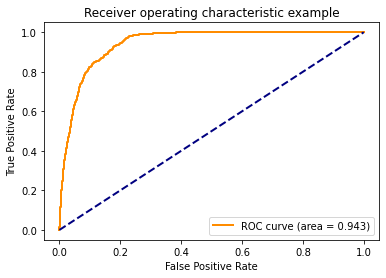

In [112]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [113]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin', 'job_bluecollar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_selfemployed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic',
       'education_highschool', 'education_illiterate',
       'education_professionalcourse', 'education_universitydegree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

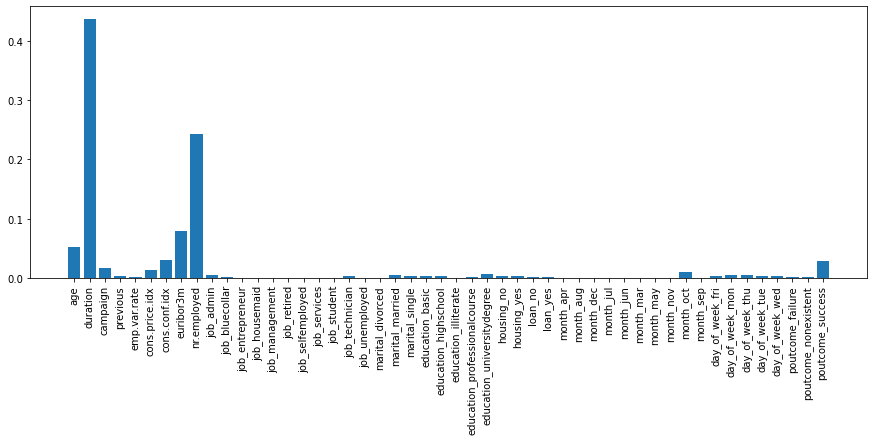

In [120]:
plt.figure(figsize=(15,5))
plt.bar(X.columns,rfm_gsmodel_result.best_estimator_.feature_importances_)
plt.xticks(X.columns,rotation='vertical')
plt.show()

# Conclusion

From our extensive analysis, we have learnt many things. <br>

Top take aways are:<br>
- Duration has a huge impact on the outcome. The more the customer is engaged, the more the probability he/she would make a deposit.<br>
- The state of the country's economy plays a huge role. The better the economy the more willing are customers to make a deposit. So campaigns should be targeted during this period. October being one such month is this financial year.<br>
- People in blue-collor jobs, admins, technitians are more probable to make a deposit.<br>
- Customers with good background education are more likely to do well financially and would have the mind set to save. University degree or higher degree holders are more likely to deposit.<br>